<a href="https://colab.research.google.com/github/siv4gurunathan/trading_journal/blob/main/portfolio_tracker_Ind_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Indian Portfolio ===

           ticker  quantity  buy_price  current_price   total_value  \
0   WAAREEENER.BO         9    1503.00    3477.350098  31296.150879   
1     TATATECH.NS        30     500.00     701.150024  21034.500732   
2     HDFCBANK.NS        16     784.81    1007.849976  16125.599609   
3      CGPOWER.NS        20     708.17     748.599976  14971.999512   
4    HBLENGINE.NS        12     642.90    1011.700012  12140.400146   
5   HINDUNILVR.NS         4    2449.85    2488.100098   9952.400391   
6    NESTLEIND.NS         8     126.43    1273.000000  10184.000000   
7        TRENT.NS         2    6576.90    4780.600098   9561.200195   
8    TATAPOWER.NS        21     274.64     410.700012   8624.700256   
9          VBL.NS        17     605.02     495.450012   8422.650208   
10  NATIONALUM.NS        32     189.00     238.100006   7619.200195   
11         NCC.NS        32     176.80     213.919998   6845.439941   
12    AXISBANK.NS         5    1090.00    1248.800

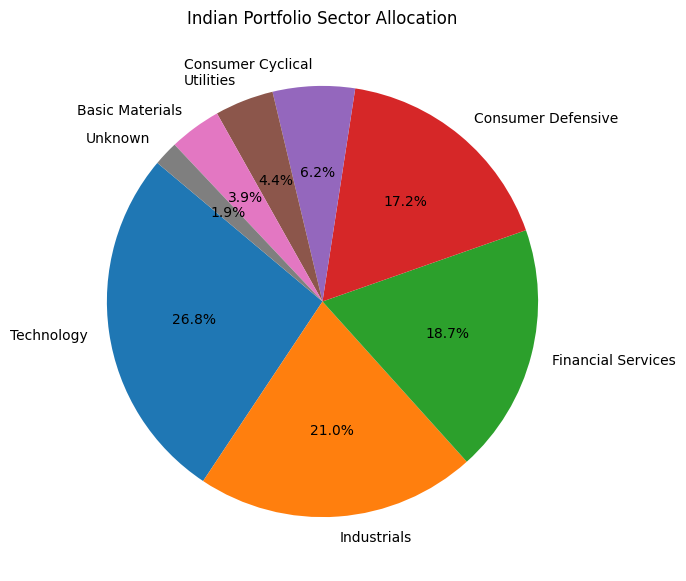

<Figure size 1000x600 with 0 Axes>

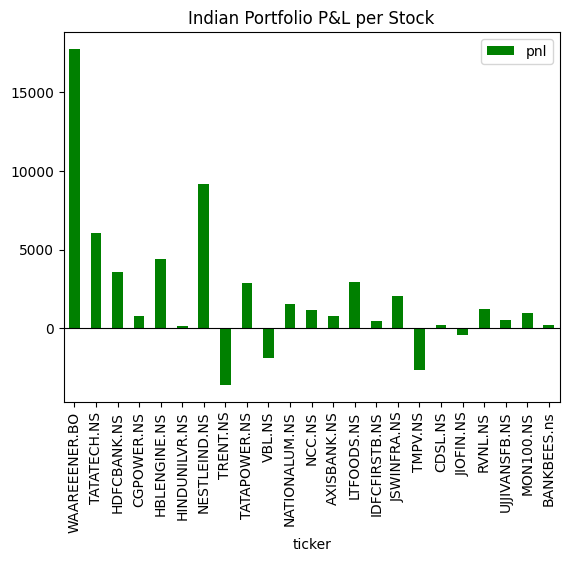

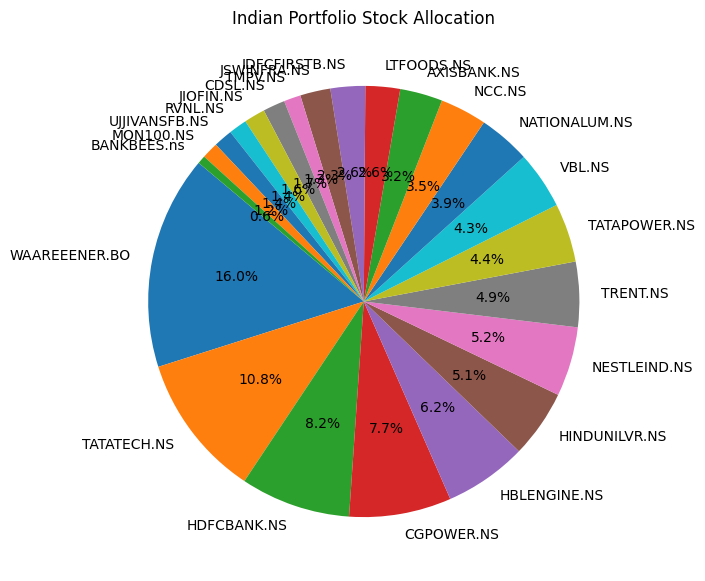


=== US Portfolio ===

  ticker  quantity  buy_price  current_price  total_value        pnl  \
0   AMZN  1.108257     175.78     229.250000   254.067805  59.258476   
1   MSFT  0.363447     412.08     542.070007   197.013894  47.244520   
2      V  0.437163     264.94     346.899994   151.651810  35.829869   
3   GOOG  0.579566     146.51     268.429993   155.572808  70.660642   
4   ABNB  0.642960     118.27     128.009995    82.305336   6.262429   
5    MKL  0.034558    1580.53    1837.959961    63.516432   8.896294   
6    VOO  0.103453     456.54     631.690002    65.349913  18.119707   
7   AAPL  0.192421     181.89     269.000000    51.761360  16.761829   

    return_%  
0  30.418705  
1  31.544847  
2  30.935304  
3  83.216158  
4   8.235389  
5  16.287572  
6  38.364656  
7  47.891583  
                        Total Value ($)  Allocation (%)
sector                                                 
Consumer Cyclical            336.373140       32.937738
Technology               

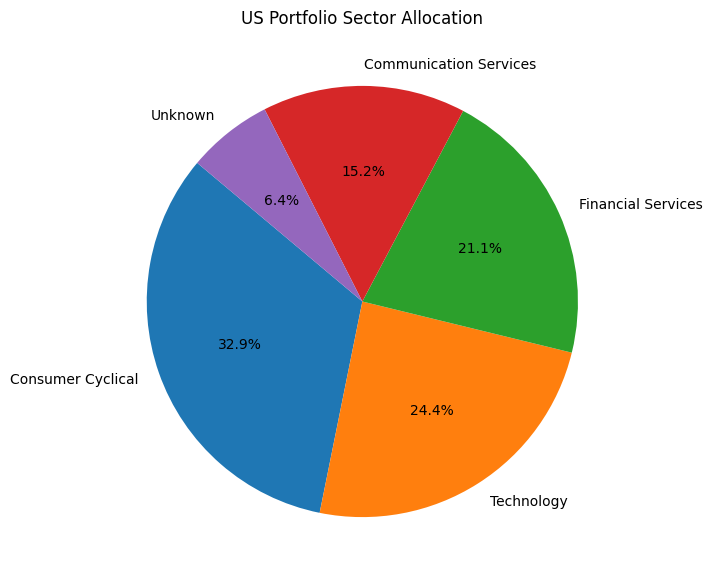

<Figure size 1000x600 with 0 Axes>

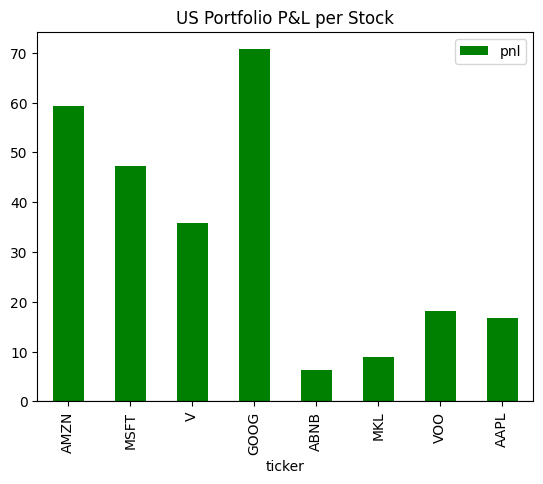

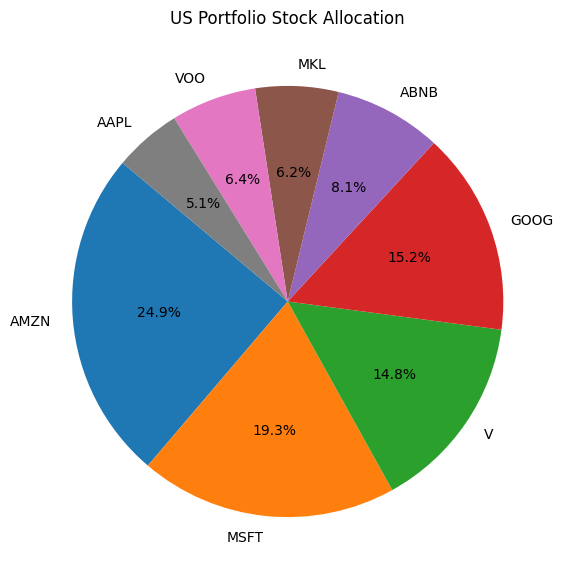

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Optional: Only import Streamlit if running dashboard
try:
    import streamlit as st
    STREAMLIT_AVAILABLE = True
except ImportError:
    STREAMLIT_AVAILABLE = False

INDIAN_PORTFOLIO_FILE = "indian_portfolio.csv"
US_PORTFOLIO_FILE = "us_portfolio.csv"


def get_price(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period="1d")
    if 'Close' in data.columns and not data['Close'].empty:
        return data['Close'].iloc[-1]
    else:
        return float('nan')


def get_sector(ticker):
    try:
        info = yf.Ticker(ticker).info
        return info.get('sector', 'Unknown')
    except:
        return 'Unknown'


def process_portfolio(df):
    df["current_price"] = df["ticker"].apply(get_price)
    df["total_value"] = df["quantity"] * df["current_price"]
    df["invested"] = df["quantity"] * df["buy_price"]
    df["pnl"] = df["total_value"] - df["invested"]
    df["return_%"] = (df["pnl"] / df["invested"]) * 100

    df['sector'] = df['ticker'].apply(get_sector)

    sector_allocation = df.groupby('sector')['total_value'].sum()
    total_portfolio_value = df['total_value'].sum()
    sector_percent = (sector_allocation / total_portfolio_value) * 100

    sector_summary = pd.DataFrame({
        'Total Value ($)': sector_allocation,
        'Allocation (%)': sector_percent
    }).sort_values(by='Total Value ($)', ascending=False)

    return df, sector_summary


def plot_sector_allocation(sector_summary, title="Sector Allocation"):
    plt.figure(figsize=(7, 7))
    plt.pie(sector_summary['Total Value ($)'], labels=sector_summary.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()


def plot_pnl_per_stock(df, title="P&L per Stock"):
    plt.figure(figsize=(10, 6))
    df.plot(kind="bar", x="ticker", y="pnl", color="green", title=title)
    plt.axhline(0, color="black", linewidth=0.8)
    plt.show()

def plot_stock_allocation(df, title="Stock Allocation"):
    plt.figure(figsize=(7,7))
    plt.pie(df['total_value'], labels=df['ticker'], autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()


# ---------- CLI VERSION ----------
def run_cli():
    df_in = pd.read_csv(INDIAN_PORTFOLIO_FILE)
    df_us = pd.read_csv(US_PORTFOLIO_FILE)

    df_in, sector_summary_in = process_portfolio(df_in)
    df_us, sector_summary_us = process_portfolio(df_us)

    print("\n=== Indian Portfolio ===\n")
    print(df_in[["ticker", "quantity", "buy_price", "current_price", "total_value", "pnl", "return_%"]])
    print(sector_summary_in)
    print("\n--- Totals ---")
    print(f"Total Invested: ${df_in['invested'].sum():,.2f}")
    print(f"Portfolio Value: ${df_in['total_value'].sum():,.2f}")
    print(f"Total P&L: ${df_in['pnl'].sum():,.2f} ({(df_in['pnl'].sum() / df_in['invested'].sum()) * 100:.2f}%)")

    plot_sector_allocation(sector_summary_in, "Indian Portfolio Sector Allocation")
    plot_pnl_per_stock(df_in, "Indian Portfolio P&L per Stock")
    plot_stock_allocation(df_in, "Indian Portfolio Stock Allocation")

    print("\n=== US Portfolio ===\n")
    print(df_us[["ticker", "quantity", "buy_price", "current_price", "total_value", "pnl", "return_%"]])
    print(sector_summary_us)
    print("\n--- Totals ---")
    print(f"Total Invested: ${df_us['invested'].sum():,.2f}")
    print(f"Portfolio Value: ${df_us['total_value'].sum():,.2f}")
    print(f"Total P&L: ${df_us['pnl'].sum():,.2f} ({(df_us['pnl'].sum() / df_us['invested'].sum()) * 100:.2f}%)")

    plot_sector_allocation(sector_summary_us, "US Portfolio Sector Allocation")
    plot_pnl_per_stock(df_us, "US Portfolio P&L per Stock")
    plot_stock_allocation(df_us, "US Portfolio Stock Allocation")


# ---------- STREAMLIT DASHBOARD ----------
def run_dashboard():
    df_in = pd.read_csv(INDIAN_PORTFOLIO_FILE)
    df_us = pd.read_csv(US_PORTFOLIO_FILE)

    df_in, sector_summary_in = process_portfolio(df_in)
    df_us, sector_summary_us = process_portfolio(df_us)

    st.title("Real-Time Portfolio Dashboard")

    st.subheader("Indian Portfolio")
    st.dataframe(df_in)
    st.metric("Total Invested (IN)", f"${df_in['invested'].sum():,.2f}")
    st.metric("Portfolio Value (IN)", f"${df_in['total_value'].sum():,.2f}")
    st.metric("Total P&L (IN)", f"${df_in['pnl'].sum():,.2f}", delta=f"{(df_in['pnl'].sum() / df_in['invested'].sum()) * 100:.2f}%")

    st.subheader("Indian Portfolio Sector Allocation")
    fig1, ax1 = plt.subplots(figsize=(7, 7))
    ax1.pie(sector_summary_in['Total Value ($)'], labels=sector_summary_in.index, autopct='%1.1f%%', startangle=140)
    ax1.set_title("Indian Portfolio Sector Allocation")
    st.pyplot(fig1)

    st.subheader("Indian Portfolio P&L by Stock")
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    df_in.plot(kind='bar', x='ticker', y='pnl', color='green', ax=ax2)
    ax2.axhline(0, color='black', linewidth=0.8)
    st.pyplot(fig2)
    st.subheader("Indian Portfolio Stock Allocation")
    fig, ax = plt.subplots(figsize=(7,7))
    ax.pie(df_in['total_value'], labels=df_in['ticker'], autopct='%1.1f%%', startangle=140)
    ax.set_title("Indian Portfolio Stock Allocation")
    st.pyplot(fig3)

    st.subheader("US Portfolio")
    st.dataframe(df_us)
    st.metric("Total Invested (US)", f"${df_us['invested'].sum():,.2f}")
    st.metric("Portfolio Value (US)", f"${df_us['total_value'].sum():,.2f}")
    st.metric("Total P&L (US)", f"${df_us['pnl'].sum():,.2f}", delta=f"{(df_us['pnl'].sum() / df_us['invested'].sum()) * 100:.2f}%")

    st.subheader("💼 US Portfolio Sector Allocation")
    fig4, ax4 = plt.subplots(figsize=(7, 7))
    ax4.pie(sector_summary_us['Total Value ($)'], labels=sector_summary_us.index, autopct='%1.1f%%', startangle=140)
    ax4.set_title("US Portfolio Sector Allocation")
    st.pyplot(fig4)

    st.subheader("US Portfolio P&L by Stock")
    fig5, ax5 = plt.subplots(figsize=(10, 6))
    df_us.plot(kind='bar', x='ticker', y='pnl', color='red', ax=ax4)
    ax5.axhline(0, color='black', linewidth=0.8)
    st.pyplot(fig5)
    st.subheader("US Portfolio Stock Allocation")
    fig, ax = plt.subplots(figsize=(7,7))
    ax.pie(df_in['total_value'], labels=df_in['ticker'], autopct='%1.1f%%', startangle=140)
    ax.set_title("US Portfolio Stock Allocation")
    st.pyplot(fig6)



# ---------- ENTRY POINT ----------
if __name__ == "__main__":
    import sys

    if STREAMLIT_AVAILABLE and ("streamlit" in sys.argv[0]):
        run_dashboard()
    else:
        run_cli()
